## <span style="color:red"> NOTE: </span> Kindly visit data_exploration.ipnyb for detailed insights on data.

# <span style="color:green">  Vegetable yield and emission of different compounds from year 2000 to 2015 </span>

## Import Packages

In [1]:
import os
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from scipy.stats import pearsonr
from sqlalchemy import create_engine

#  <span style="color:purple"> Introduction </span>

## Motivation

<ul>
    <li>Reduce the water poluution</li>
    <li>Protect water</li>
    <li>Food security</li>
    <li>Improve economy</li>
    <li>Improve health and reduce diseases</li>        
</ul>

## Problem

In this document I will try to answer below questions.
<ul>
    <li>Has the vegetable yield is increased or decreased? </li>
    <li>Has the pollution of water increased or decreased? </li>
    <li>What is the relation between vegetable yield and water? </li>

</ul>

#  <span style="color:purple"> Method </span>

## Datasource1: Vegetables yield year 2000-2015

Data engieering is done for 2000, 2005, 2010, 2015.

This dataset contains information about the harvest of vegetables in the european country Netherlands.
It concerns the harvest of vegetables (total yield in million-kg) and the corresponding cropping area (in hectares). But overhere, my focus would be total yield in million-kg for year 

Gross yield = The yield of vegetables in million kg.

The vegetables are broken down as follows:
- Other vegetables (Garlic and Onion)
- Strawberry
- Spinach
- Belgian Endive
- Lettuce
- Iceberg
- Tuberous
- Carrot
- Cabbage
- Legume
- Bean
- Apple
- Courgette

* Data URL:  https://opendata.cbs.nl/statline/#/CBS/en/dataset/37738ENG/table
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/37738ENG/TypedDataSet?dl=9ADD1
* Data Type: CSV


## Datasource2: Emissions to water 2000 to 2015

Data engieering is done for 2000, 2005, 2010, 2015.

This datset provided information about the origin of emissions to water of nutrients and heavy metals into water. These data are part of the environmental accounts. Direct emissions are emitted directly into the environment. Indirect emissions reach the environment in an indirect way. For example, discharges to the sewer system partly reach the surface water after treatment in wastewater treatment plants.

Factors like:
- Industrial waste
- Chemical manufactruing waste 
- Pharmaceuticals manufactruing waste 

Emissions to water, heavy metals: A group of metals with a high atomic weight, in particular metals with high toxicity, such as:
- Chromium
- Copper	
- Mercury
- Lead	
- Nickel	
- Zinc	

Emissions to water, Nutrients: Compounds whicht are necessary for the growth of crops and plant, (suc as:ter
- Phosphorus
- OtherNutrie (Nitrogen)nts	

* Data URL: https://opendata.cbs.nl/statline/#/CBS/en/dataset/83605ENG/table?ts=1698675109480
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/83605ENG/TypedDataSet?dl=9ADCA  
* Data Type: CSV

# Load Data

### Read data from datasource

In [2]:
_database = '../data/data.sqlite'

In [3]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists(_database):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
engine = create_engine(f'sqlite:///{_database}')
connection = engine.connect()

df_vegetable = pd.read_sql_table('vegetable', connection,index_col='Vegetables')
df_water = pd.read_sql_table('water', connection, index_col='Origin')

#  <span style="color:red"> **1 - Vegetable Data** </span>

## Preprocess data

In [4]:
 df_vegetable.columns

Index(['year', 'gross_yield_million_kilogram'], dtype='object')

In [5]:
df_vegetable.index.name

'Vegetables'

In [6]:
df_vegetable.index.unique()

Index(['Onion/Garlic', 'Strawberry', 'Spinach', 'Belgian endive', 'Lettuce',
       'Iceberg', 'Tuberous', 'Radishes', 'Carrot', 'Cabbage', 'Legume',
       'Bean', 'Apple', 'Courgette'],
      dtype='object', name='Vegetables')

In [7]:
# Convert European punkt (,) to American decimal (.)
df_vegetable["gross_yield_million_kilogram"] =  df_vegetable["gross_yield_million_kilogram"].str.replace(',','.')

# Sorting by column 'gross_yield_million_kilogram'
df_vegetable = df_vegetable.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)

# Convert data type from string to float
df_vegetable["gross_yield_million_kilogram"] = df_vegetable.gross_yield_million_kilogram.astype(float)

In [8]:
df_vegetable.dtypes

year                              int64
gross_yield_million_kilogram    float64
dtype: object

## <span style="color:blue"> **1.1 - Filter Data** </span> 

## <span style="color:brown"> **1.1.1 - By year** </span> 

In [9]:
# Filter data by year
# # Method 1 (works): Select subset from dataframe
fixed_year_2000 = df_vegetable.loc[df_vegetable['year'] == 2000]
fixed_year_2005 = df_vegetable.loc[df_vegetable['year'] == 2005]

fixed_year_2010 = df_vegetable.loc[df_vegetable['year'] == 2010]
fixed_year_2015 = df_vegetable.loc[df_vegetable['year'] == 2015]


## <span style="color:brown"> **1.1.2 - By Index** </span> 

In [10]:
# Filter data by index
onion = df_vegetable.loc[df_vegetable.index == 'Onion/Garlic']
Strawberry = df_vegetable.loc[df_vegetable.index == 'Strawberry']
Spinach = df_vegetable.loc[df_vegetable.index == 'Spinach']
Belgian_endive = df_vegetable.loc[df_vegetable.index == 'Belgian endive']
Lettuce = df_vegetable.loc[df_vegetable.index == 'Lettuce']
Iceberg = df_vegetable.loc[df_vegetable.index == 'Iceberg']
Tuberous = df_vegetable.loc[df_vegetable.index == 'Tuberous']
Radishes = df_vegetable.loc[df_vegetable.index == 'Radishes']
Carrot = df_vegetable.loc[df_vegetable.index == 'Carrot']
Cabbage = df_vegetable.loc[df_vegetable.index == 'Cabbage']
Legume = df_vegetable.loc[df_vegetable.index == 'Legume']
Bean = df_vegetable.loc[df_vegetable.index == 'Bean']
Apple = df_vegetable.loc[df_vegetable.index == 'Apple']
Courgette = df_vegetable.loc[df_vegetable.index == 'Courgette']

## <span style="color:blue"> **1.2 - Plotting** </span> 

## <span style="color:green"> **1.2.1 - Plot for all vegetables for a single fixed Year** </span>  

<function matplotlib.pyplot.show(close=None, block=None)>

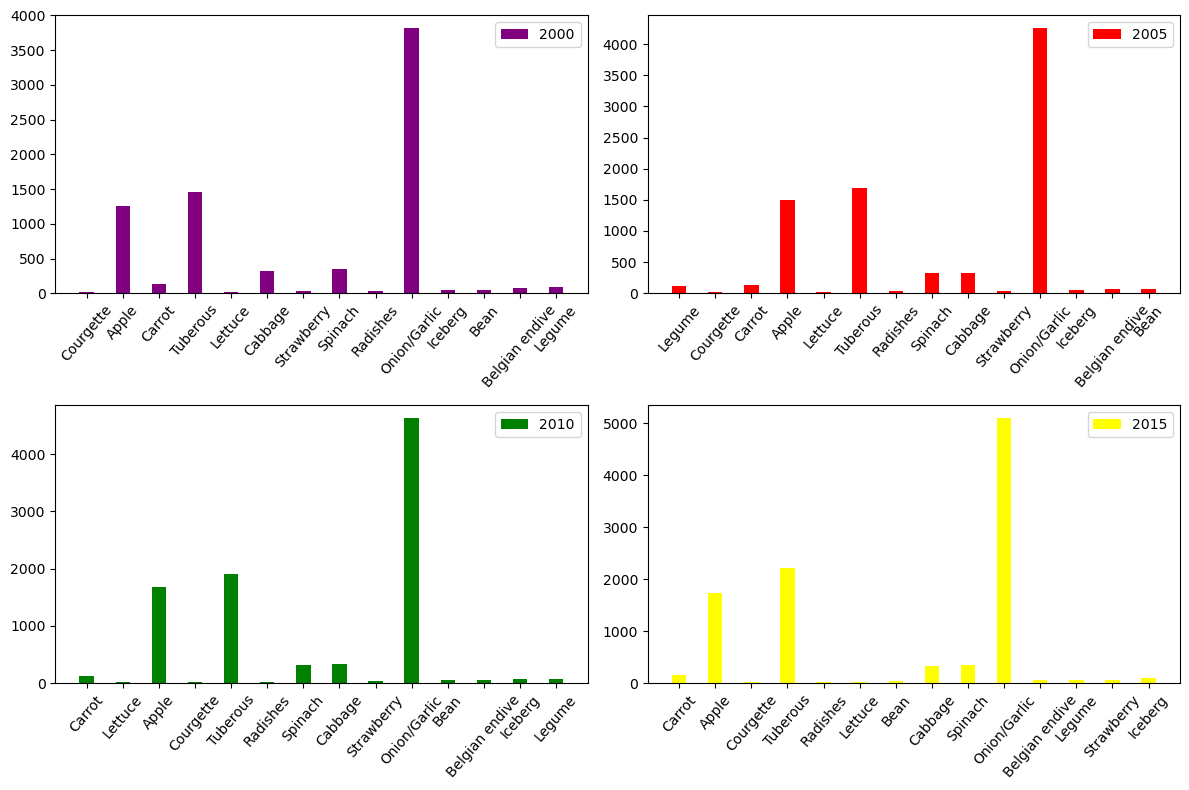

In [11]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.4, label='2000', color='purple')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].bar(fixed_year_2005.index, fixed_year_2005.gross_yield_million_kilogram,  0.4, label='2005', color='red')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].bar(fixed_year_2010.index, fixed_year_2010.gross_yield_million_kilogram,  0.4, label='2010', color='green')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].bar(fixed_year_2015.index, fixed_year_2015.gross_yield_million_kilogram,  0.4, label='2015', color='yellow')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

fig.tight_layout()
plt.show

Object `## Method 2: works fine` not found.


<function matplotlib.pyplot.show(close=None, block=None)>

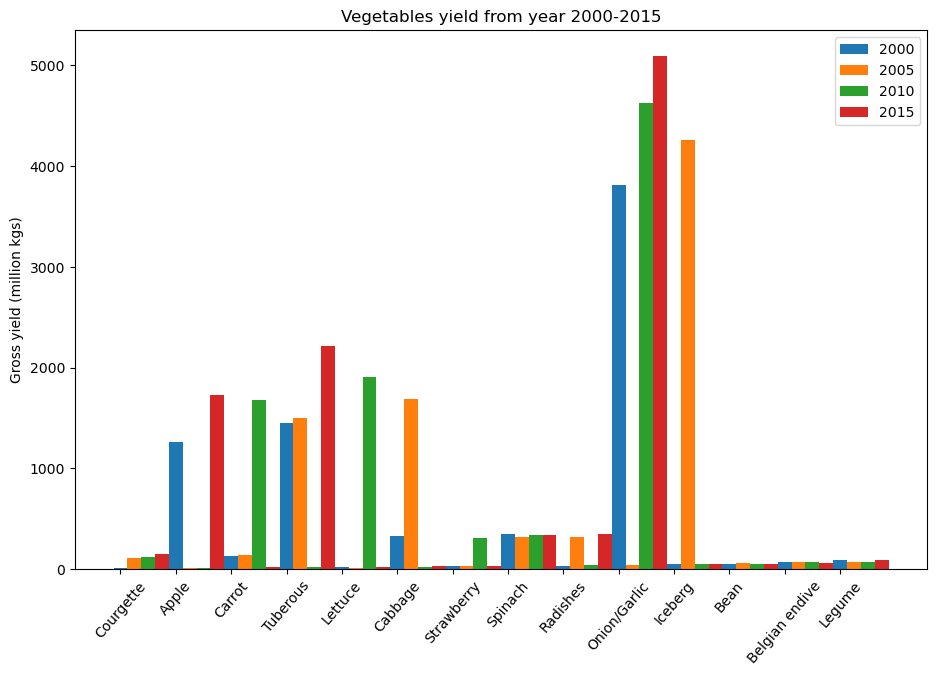

In [12]:
?## Method 2: works fine
ind = np.arange(len(fixed_year_2000))  
width = 0.25

plt.figure(figsize=(11, 7))
plt.subplot(1, 1, 1)

plt.bar(ind+width, fixed_year_2000.gross_yield_million_kilogram,  width, label='2000')
plt.bar(ind+width*2, fixed_year_2005.gross_yield_million_kilogram,  width, label='2005')
plt.bar(ind+width*3, fixed_year_2010.gross_yield_million_kilogram,  width, label='2010')
plt.bar(ind+width*4, fixed_year_2015.gross_yield_million_kilogram,  width, label='2015')

plt.legend()
plt.title('Vegetables yield from year 2000-2015')
plt.ylabel('Gross yield (million kgs)')
plt.xticks(ind+width, fixed_year_2000.index) 
plt.xticks(rotation=49)
plt.show


## <span style="color:green"> **1.2.2 - Plot of a single vegetable over the years** </span>  

In [13]:
# Sort according to ['year']
# This steps will be done over here (lazmi to keep it here and not move upward in filter)

onion = onion.sort_values(by=['year'], axis=0, ascending=True)
Strawberry = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Spinach = Spinach.sort_values(by=['year'], axis=0, ascending=True)
Belgian_endive = Belgian_endive.sort_values(by=['year'], axis=0, ascending=True)
Lettuce = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Iceberg = Iceberg.sort_values(by=['year'], axis=0, ascending=True)
Tuberous = Tuberous.sort_values(by=['year'], axis=0, ascending=True)
Radishes = Radishes.sort_values(by=['year'], axis=0, ascending=True)
Carrot = Carrot.sort_values(by=['year'], axis=0, ascending=True)
Cabbage = Cabbage.sort_values(by=['year'], axis=0, ascending=True)
Legume = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Bean = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Apple = Apple.sort_values(by=['year'], axis=0, ascending=True)
Courgette = Courgette.sort_values(by=['year'], axis=0, ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

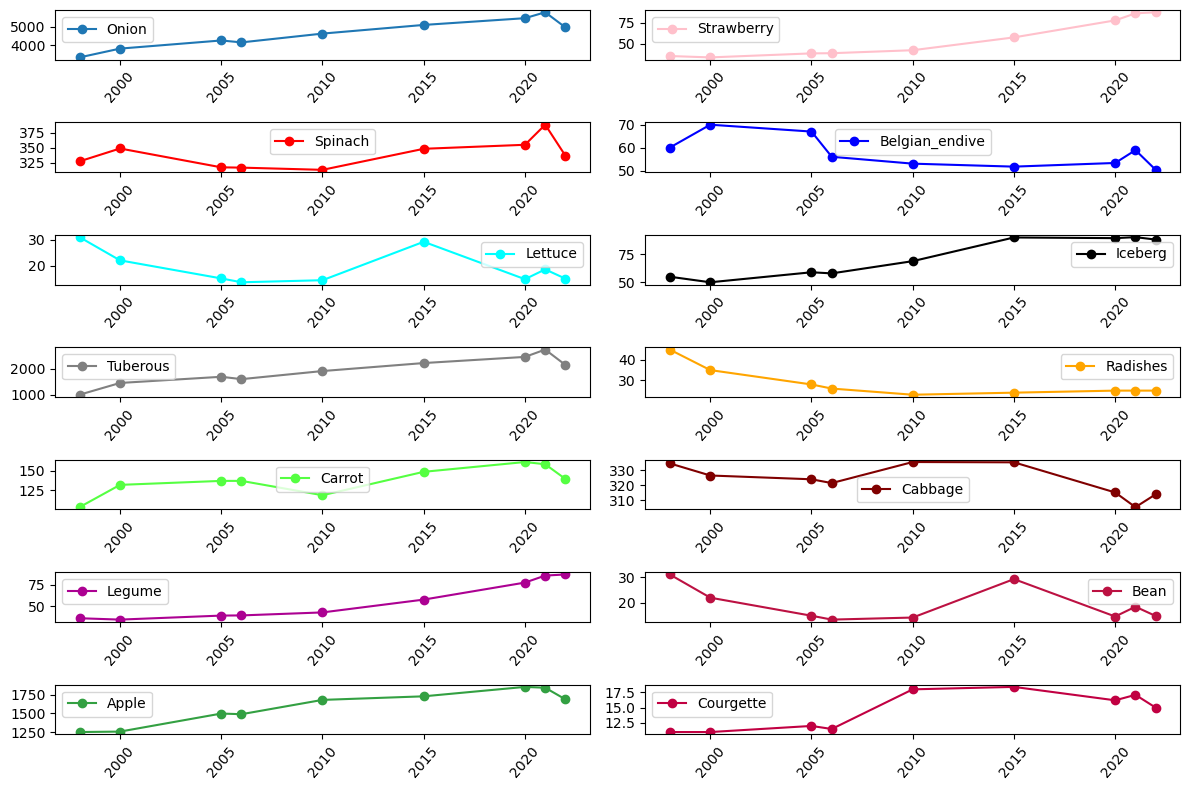

In [14]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 8))

axes[0,0].plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].plot(Spinach.year, Spinach.gross_yield_million_kilogram, 'o-', label='Spinach', color='red')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].plot(Belgian_endive.year, Belgian_endive.gross_yield_million_kilogram, 'o-', label='Belgian_endive', color='blue')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

axes[2,0].plot(Lettuce.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
axes[2,0].legend()
axes[2,0].tick_params(axis='x', rotation=49)

axes[2,1].plot(Iceberg.year, Iceberg.gross_yield_million_kilogram, 'o-', label='Iceberg', color='black')
axes[2,1].legend()
axes[2,1].tick_params(axis='x', rotation=49)

axes[3,0].plot(Tuberous.year, Tuberous.gross_yield_million_kilogram, 'o-', label='Tuberous', color='gray')
axes[3,0].legend()
axes[3,0].tick_params(axis='x', rotation=49)

axes[3,1].plot(Radishes.year, Radishes.gross_yield_million_kilogram, 'o-', label='Radishes', color='orange')
axes[3,1].legend()
axes[3,1].tick_params(axis='x', rotation=49)

axes[4,0].plot(Carrot.year, Carrot.gross_yield_million_kilogram, 'o-', label='Carrot', color='#55FF42')
axes[4,0].legend()
axes[4,0].tick_params(axis='x', rotation=49)

axes[4,1].plot(Cabbage.year, Cabbage.gross_yield_million_kilogram, 'o-', label='Cabbage', color='maroon')
axes[4,1].legend()
axes[4,1].tick_params(axis='x', rotation=49)

axes[5,0].plot(Legume.year, Legume.gross_yield_million_kilogram, 'o-', label='Legume', color='#AC0192')
axes[5,0].legend()
axes[5,0].tick_params(axis='x', rotation=49)

axes[5,1].plot(Bean.year, Bean.gross_yield_million_kilogram, 'o-', label='Bean', color='#BC1142')
axes[5,1].legend()
axes[5,1].tick_params(axis='x', rotation=49)

axes[6,0].plot(Apple.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='#33A042')
axes[6,0].legend()
axes[6,0].tick_params(axis='x', rotation=49)

axes[6,1].plot(Courgette.year, Courgette.gross_yield_million_kilogram, 'o-', label='Courgette', color='#C10042')
axes[6,1].legend()
axes[6,1].tick_params(axis='x', rotation=49)

fig.tight_layout()

plt.show

<!-- # Vegetable accumulation analysis -->

In [15]:
# # Collapse all vegeatbles by summing them over the years
# vegetable_wise = df_vegetable.groupby(df_vegetable.index).sum()
# # Drop year column
# vegetable_wise = vegetable_wise.drop(['year'], axis=1)
# # Sort the rows according to the total yield
# vegetable_wise = vegetable_wise.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)


In [ ]:
# fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.bar(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 0.4, label='Vegetable Wise', color='#9CA864')

# ax1.legend()
# ax1.set_title('Vegetable yield over the years 1995-2020')
# ax1.set_ylabel('Yield (in million kilograms)')
# ax1.tick_params(axis='x', rotation=49)

# ax3.plot(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 'o-', label='Vegetable Wise', color='#8CA864')

# ax3.legend()
# ax3.set_title('Vegetable yield over the years 1995-2020')
# ax3.tick_params(axis='x', rotation=49)

# plt.tight_layout()
# plt.show()

In [ ]:
# year_wise = df_vegetable.groupby('year').sum()
# # Delete last two rows of daraframe
# year_wise = year_wise.drop(year_wise.tail(2).index)
# year_wise

In [ ]:
# fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.bar(year_wise.index, year_wise.gross_yield_million_kilogram, 0.4, label='Yearly gross yield', color='green')

# ax1.legend()
# ax1.set_title('Gross yield over the years 1995-2020')
# ax1.set_ylabel('Yield (in million kilograms)')
# ax1.tick_params(axis='x', rotation=49)

# ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='pink')
# ax3.legend()
# ax3.set_title('Yield (in million kilograms)')

# plt.tight_layout()
# plt.show()

#  <span style="color:red"> **2 - Water Data** </span>

## Preprocess data 

In [16]:
# Set name of columns
df_water.columns = ["Year", "Chromium", "Copper", "Mercury", "Lead", "Nickel", "Zinc", "Nitrogen", "Phosphorus"]

In [17]:
df_water = df_water.dropna(axis=0)

## <span style="color:blue"> **2.1 - Filter Data** </span> 

## <span style="color:brown"> **2.1.1 - By year** </span> 

In [18]:
df_water.Year.unique()

array([1995., 2000., 2005., 2010., 2013., 2014.])

In [19]:
# # Method 2 (works):
# # year_df_vegetable = df_vegetable[df_vegetable['year'] == 2010]

water_year_2000 = df_water[df_water['Year'] == 2000]
water_year_2005 = df_water[df_water['Year'] == 2005]
water_year_2010 = df_water[df_water['Year'] == 2010]
water_year_2015 = df_water[df_water['Year'] == 2014]

## <span style="color:brown"> **2.1.2 - By Column** </span> 

In [20]:
Chromium = df_water[['Chromium']]
Copper = df_water[['Copper']]
Mercury = df_water[['Mercury']]
Lead = df_water[['Lead']]
Nickel = df_water[['Nickel']]
Zinc = df_water[['Zinc']]
Nitrogen = df_water[['Nitrogen']]
Phosphorus = df_water[['Phosphorus']]

## <span style="color:brown"> **2.1.2 - By Index** </span> 

In [21]:
# Filter data by index

# Agriculture = df_water.loc[df_water.index == 'Agriculture']
Industrial = df_water.loc[df_water.index == 'Industrial']
Chemical_Manufacturing = df_water.loc[df_water.index == 'Chemical Manufacturing']
Pharmaceuticals_Manufacturing = df_water.loc[df_water.index == 'Pharmaceuticals Manufacturing']

## <span style="color:blue"> **2.2 - Plotting** </span> 

## <span style="color:green"> **2.2.1 - Plot By year** </span> 

<function matplotlib.pyplot.show(close=None, block=None)>

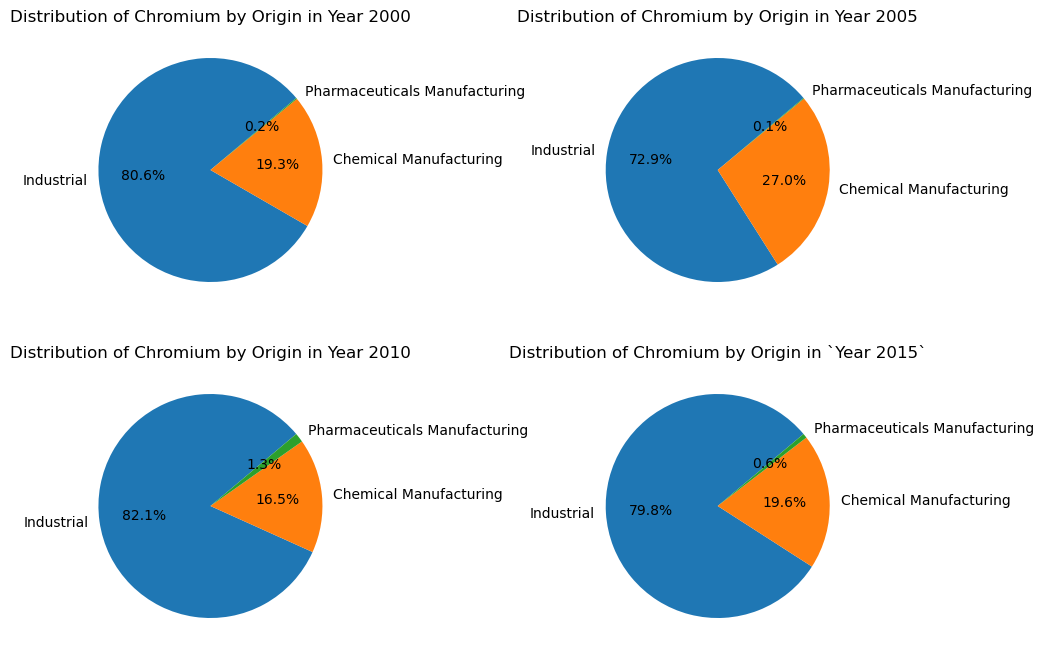

In [22]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Chromium[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Chromium by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Chromium[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Chromium by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Chromium[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Chromium by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Chromium[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Chromium by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

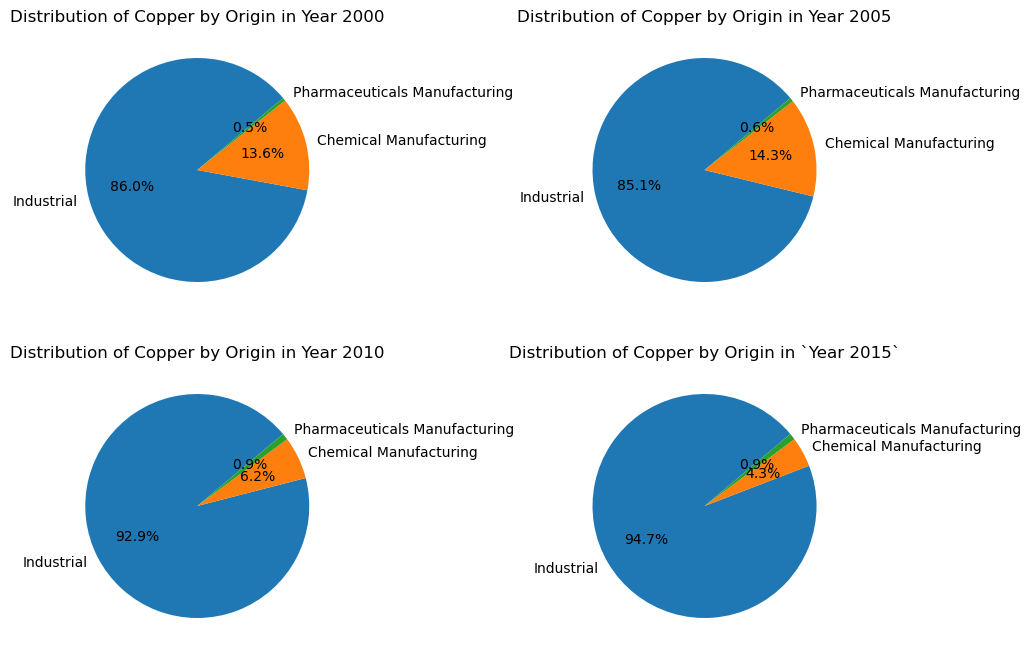

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Copper[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Copper by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Copper[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Copper by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Copper[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Copper by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Copper[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Copper by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

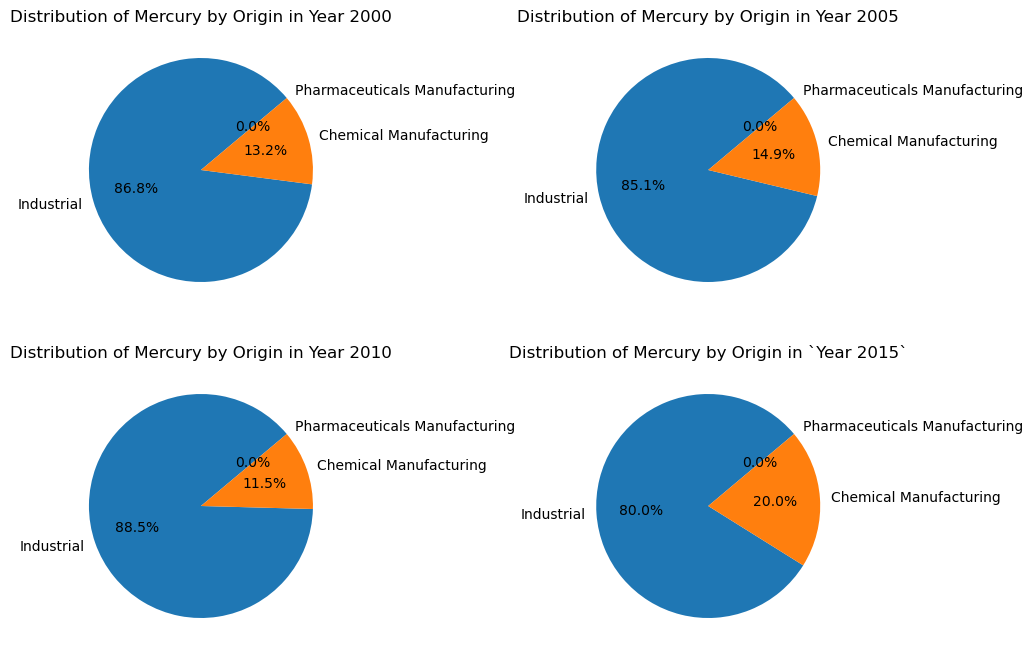

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Mercury[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Mercury by Origin in Year 2000')
# axes[0,0].legend()

axes[0,1].pie(water_year_2005.Mercury[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Mercury by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Mercury[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Mercury by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Mercury[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Mercury by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

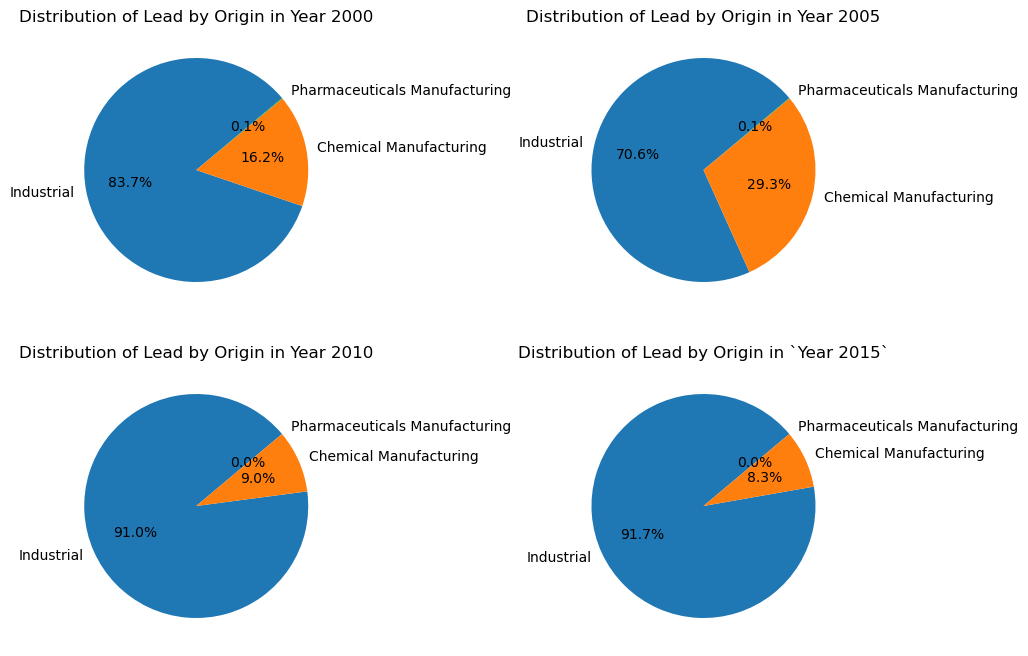

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Lead[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Lead by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Lead[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Lead by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Lead[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Lead by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Lead[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Lead by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

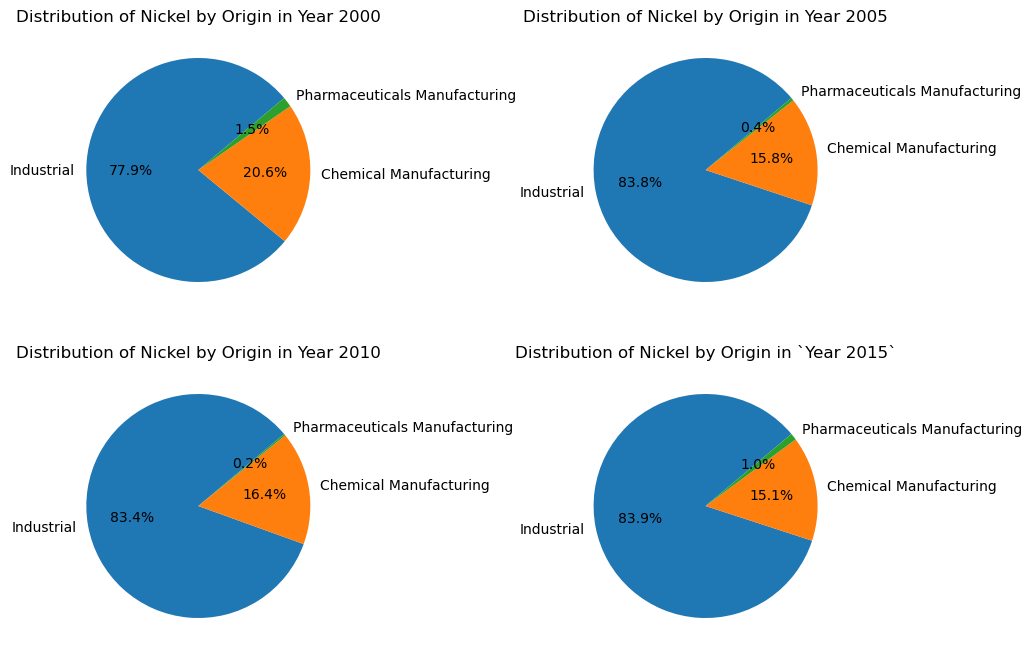

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Nickel[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Nickel by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Nickel[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Nickel by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Nickel[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Nickel by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Nickel[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Nickel by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

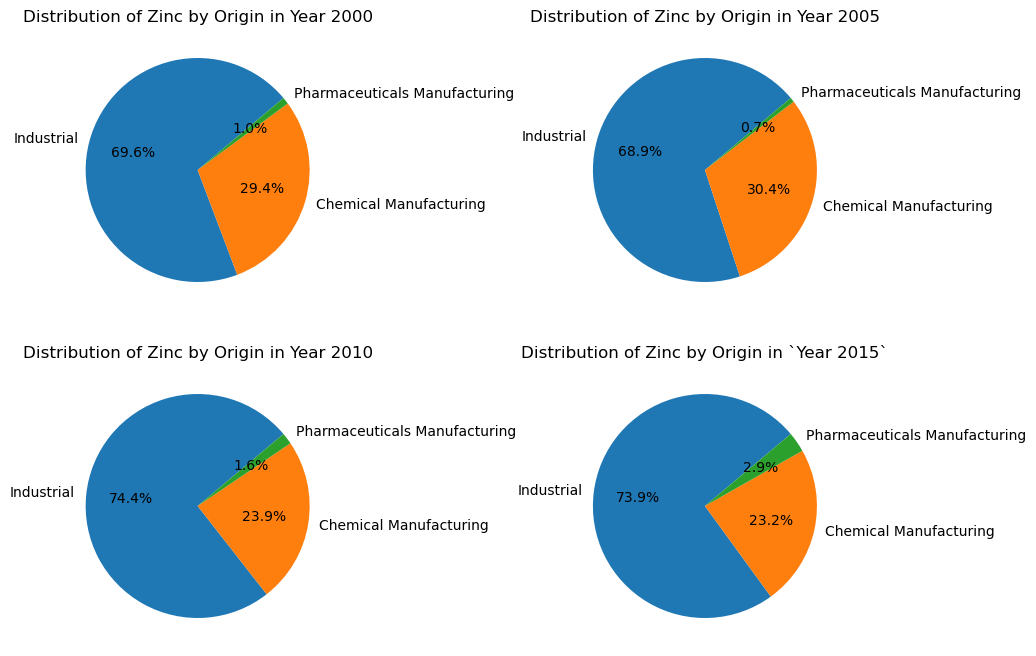

In [28]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Zinc[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Zinc by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Zinc[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Zinc by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Zinc[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Zinc by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Zinc[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Zinc by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

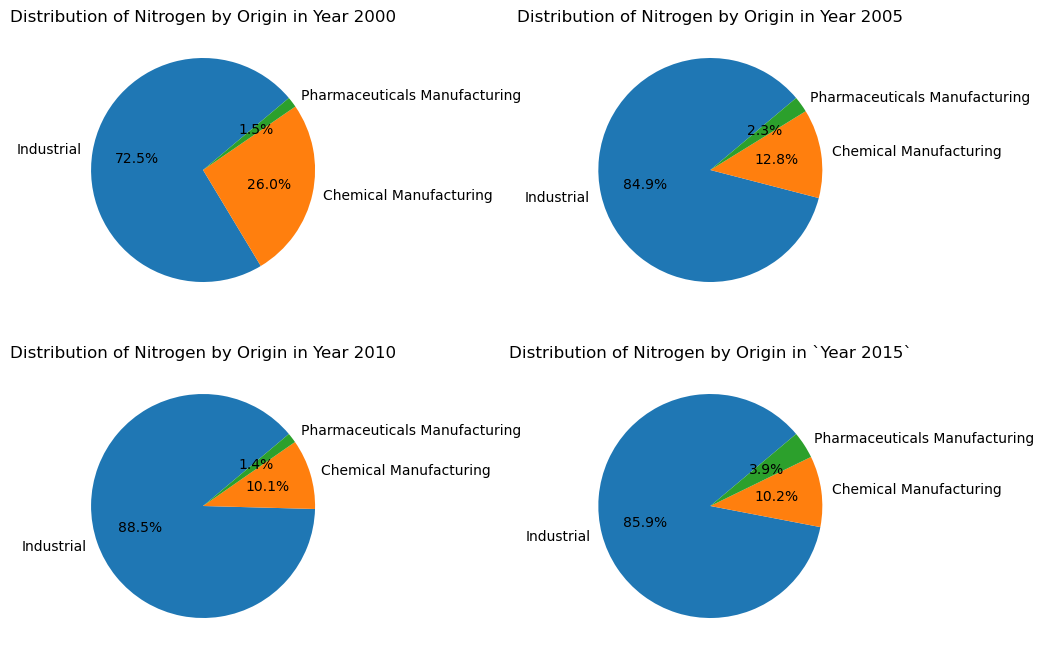

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Nitrogen[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Nitrogen by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Nitrogen[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Nitrogen by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Nitrogen[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Nitrogen by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Nitrogen[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Nitrogen by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

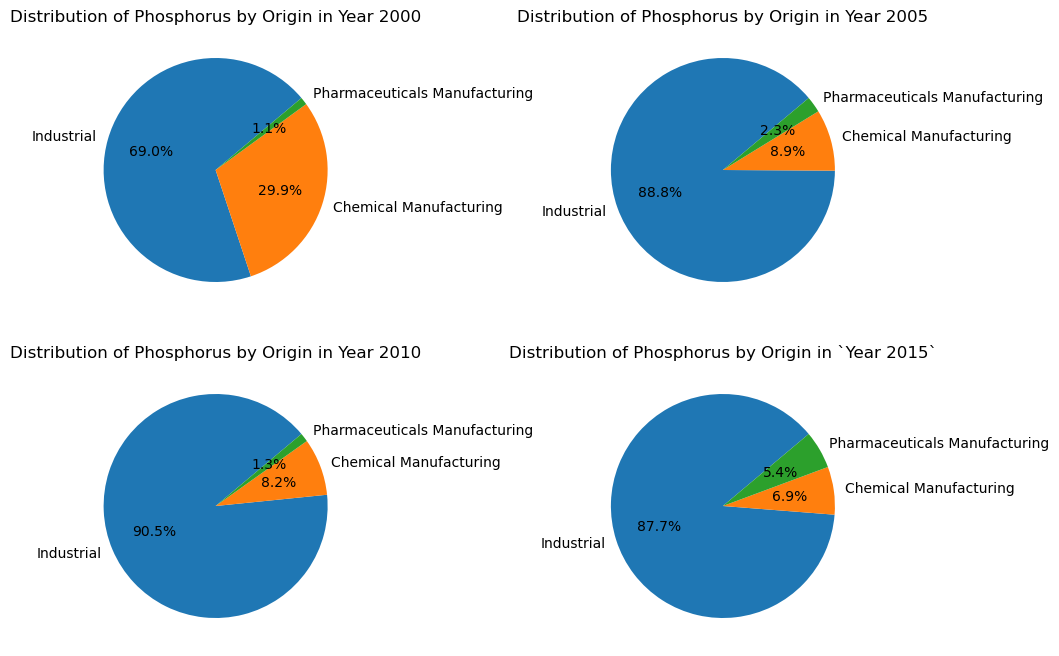

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Phosphorus[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Phosphorus by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Phosphorus[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Phosphorus by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Phosphorus[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Phosphorus by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Phosphorus[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Phosphorus by Origin in `Year 2015`')

plt.show

## <span style="color:green"> **2.2.1 - Plot By Column** </span> 

In [31]:
# Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:]

In [32]:
# df_water.Year.unique()[:]

<function matplotlib.pyplot.show(close=None, block=None)>

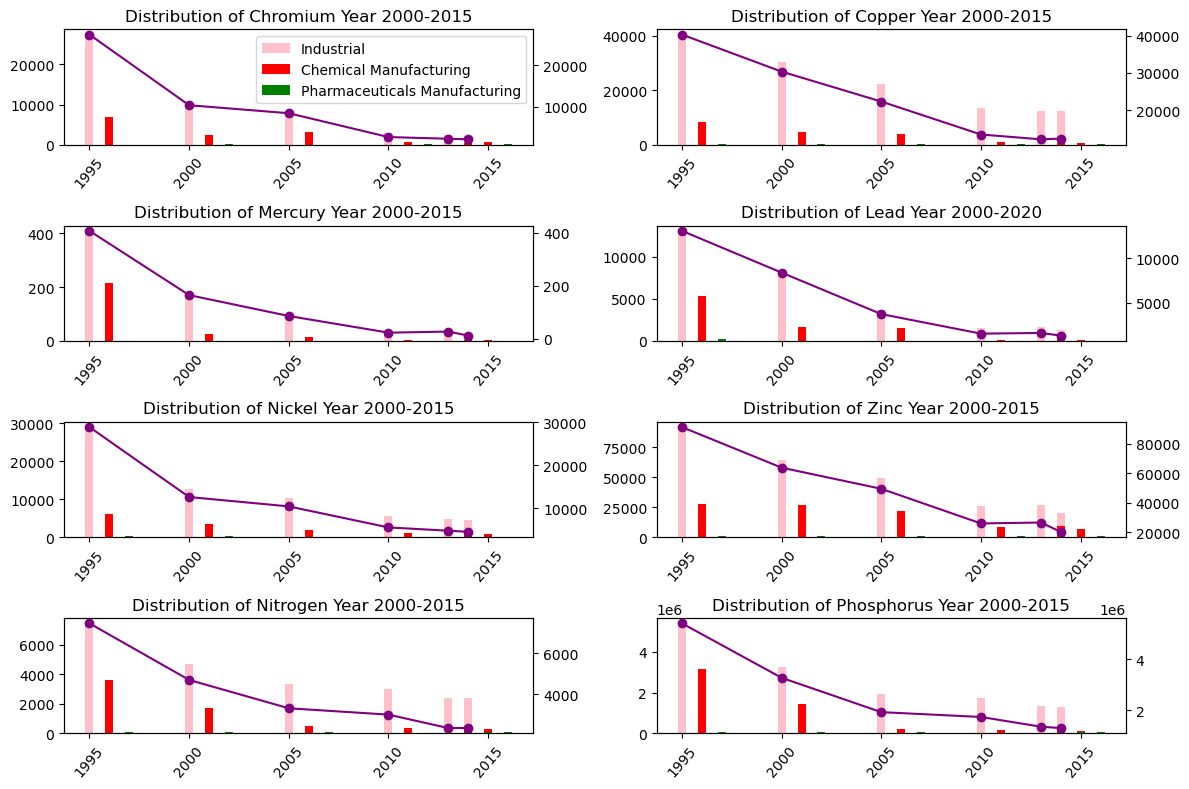

In [33]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# Chromium	Copper	Mercury	Lead	Nickel	Zinc	OtherNutrients	Phosphorus

# Chromium
axes[0,0].bar(df_water.Year.unique()[:], Chromium[Chromium.index == 'Industrial'].Chromium[:],  0.4, label='Industrial', color='pink')
axes[0,0].bar(df_water.Year.unique()[:]+1, Chromium[Chromium.index == 'Chemical Manufacturing'].Chromium[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,0].bar(df_water.Year.unique()[:]+2, Chromium[Chromium.index == 'Pharmaceuticals Manufacturing'].Chromium[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)
axes[0,0].set_title('Distribution of Chromium Year 2000-2015')

ax2 = axes[0,0].twinx()
ax2.plot(df_water.Year.unique(), Chromium[Chromium.index == 'Industrial'].Chromium[:], 'o-', color='purple')


# Copper
axes[0,1].bar(df_water.Year.unique()[:], Copper[Copper.index == 'Industrial'].Copper[:],  0.4, label='Industrial', color='pink')
axes[0,1].bar(df_water.Year.unique()[:]+1, Copper[Copper.index == 'Chemical Manufacturing'].Copper[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,1].bar(df_water.Year.unique()[:]+2, Copper[Copper.index == 'Pharmaceuticals Manufacturing'].Copper[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,1].tick_params(axis='x', rotation=49)
axes[0,1].set_title('Distribution of Copper Year 2000-2015')

ax2 = axes[0,1].twinx()
ax2.plot(df_water.Year.unique(), Copper[Copper.index == 'Industrial'].Copper[:], 'o-', color='purple')


# Mercury 
axes[1,0].bar(df_water.Year.unique()[:], Mercury[Mercury.index == 'Industrial'].Mercury[:],  0.4, label='Industrial', color='pink')
axes[1,0].bar(df_water.Year.unique()[:]+1, Mercury[Mercury.index == 'Chemical Manufacturing'].Mercury[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,0].bar(df_water.Year.unique()[:]+2, Mercury[Copper.index == 'Pharmaceuticals Manufacturing'].Mercury[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,0].tick_params(axis='x', rotation=49)
axes[1,0].set_title('Distribution of Mercury Year 2000-2015')

ax2 = axes[1,0].twinx()
ax2.plot(df_water.Year.unique(), Mercury[Mercury.index == 'Industrial'].Mercury[:], 'o-', color='purple')


# Lead
axes[1,1].bar(df_water.Year.unique()[:], Lead[Lead.index == 'Industrial'].Lead[:],  0.4, label='Industrial', color='pink')
axes[1,1].bar(df_water.Year.unique()[:]+1, Lead[Lead.index == 'Chemical Manufacturing'].Lead[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,1].bar(df_water.Year.unique()[:]+2, Lead[Lead.index == 'Pharmaceuticals Manufacturing'].Lead[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,1].tick_params(axis='x', rotation=49)
axes[1,1].set_title('Distribution of Lead Year 2000-2020')

ax2 = axes[1,1].twinx()
ax2.plot(df_water.Year.unique(), Lead[Lead.index == 'Industrial'].Lead[:], 'o-', color='purple')

# Nickel
axes[2,0].bar(df_water.Year.unique()[:], Nickel[Nickel.index == 'Industrial'].Nickel[:],  0.4, label='Industrial', color='pink')
axes[2,0].bar(df_water.Year.unique()[:]+1, Nickel[Nickel.index == 'Chemical Manufacturing'].Nickel[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,0].bar(df_water.Year.unique()[:]+2, Nickel[Nickel.index == 'Pharmaceuticals Manufacturing'].Nickel[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,0].tick_params(axis='x', rotation=49)
axes[2,0].set_title('Distribution of Nickel Year 2000-2015')

ax2 = axes[2,0].twinx()
ax2.plot(df_water.Year.unique(), Nickel[Nickel.index == 'Industrial'].Nickel[:], 'o-', color='purple')


# Zinc
axes[2,1].bar(df_water.Year.unique()[:], Zinc[Zinc.index == 'Industrial'].Zinc[:],  0.4, label='Industrial', color='pink')
axes[2,1].bar(df_water.Year.unique()[:]+1, Zinc[Zinc.index == 'Chemical Manufacturing'].Zinc[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,1].bar(df_water.Year.unique()[:]+2, Zinc[Zinc.index == 'Pharmaceuticals Manufacturing'].Zinc[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,1].tick_params(axis='x', rotation=49)
axes[2,1].set_title('Distribution of Zinc Year 2000-2015')

ax2 = axes[2,1].twinx()
ax2.plot(df_water.Year.unique(), Zinc[Zinc.index == 'Industrial'].Zinc[:], 'o-', color='purple')


# Nitrogen
axes[3,0].bar(df_water.Year.unique()[:], Nitrogen[Nitrogen.index == 'Industrial'].Nitrogen[:],  0.4, label='Industrial', color='pink')
axes[3,0].bar(df_water.Year.unique()[:]+1, Nitrogen[Nitrogen.index == 'Chemical Manufacturing'].Nitrogen[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,0].bar(df_water.Year.unique()[:]+2, Nitrogen[Nitrogen.index == 'Pharmaceuticals Manufacturing'].Nitrogen[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,0].tick_params(axis='x', rotation=49)
axes[3,0].set_title('Distribution of Nitrogen Year 2000-2015')

ax2 = axes[3,0].twinx()
ax2.plot(df_water.Year.unique(), Nitrogen[Nitrogen.index == 'Industrial'].Nitrogen[:], 'o-', color='purple')


# Phosphorus
axes[3,1].bar(df_water.Year.unique()[:], Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:],  0.4, label='Industrial', color='pink')
axes[3,1].bar(df_water.Year.unique()[:]+1, Phosphorus[Phosphorus.index == 'Chemical Manufacturing'].Phosphorus[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,1].bar(df_water.Year.unique()[:]+2, Phosphorus[Phosphorus.index == 'Pharmaceuticals Manufacturing'].Phosphorus[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,1].tick_params(axis='x', rotation=49)
axes[3,1].set_title('Distribution of Phosphorus Year 2000-2015')

ax2 = axes[3,1].twinx()
ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:], 'o-', color='purple')

fig.tight_layout()
plt.show

## <span style="color:green"> **2.2.3 - Plot By Index** </span> 

In [34]:
# Get 1st row
# Chemical_Manufacturing.iloc[1]

In [35]:
# Get 1st row and skip 1st element (eg. year)
# Chemical_Manufacturing.iloc[1][1:]

In [36]:
# Get 1st row and skip 1st element (eg. year)
# Chemical_Manufacturing.iloc[0][1:].values

<function matplotlib.pyplot.show(close=None, block=None)>

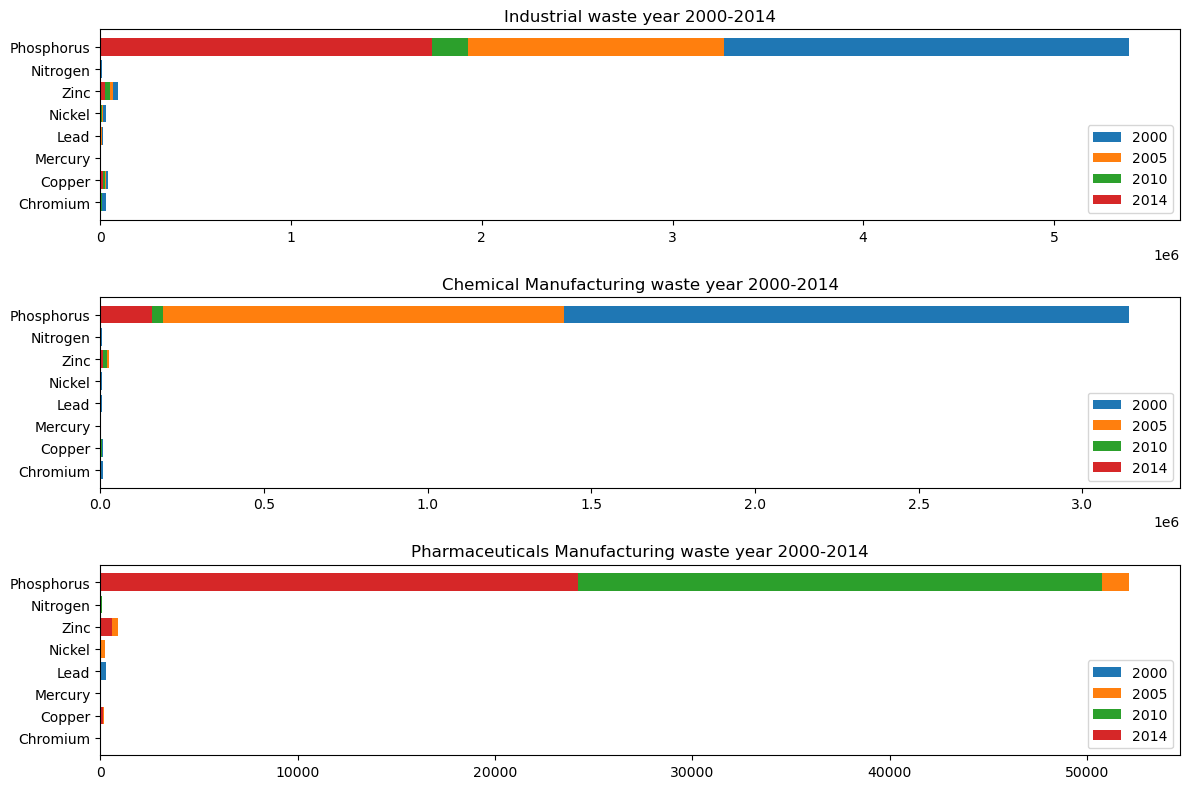

In [37]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

# Industrial
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[0][1:], label='2000')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[1][1:], label='2005')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[2][1:], label='2010')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[3][1:], label='2014')

axes[0].legend(loc = 'lower right')
axes[0].set_title('Industrial waste year 2000-2014')


axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[0][1:], label='2000')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[1][1:], label='2005')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[2][1:], label='2010')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[3][1:], label='2014')

axes[1].legend(loc = 'lower right')
axes[1].set_title('Chemical Manufacturing waste year 2000-2014')


axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[0][1:], label='2000')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[1][1:], label='2005')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[2][1:], label='2010')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[3][1:], label='2014')

axes[2].legend(loc = 'lower right')
axes[2].set_title('Pharmaceuticals Manufacturing waste year 2000-2014')

fig.tight_layout()
plt.show

#  <span style="color:purple"> Result </span> 

## Vegetable accumulation analysis

In [38]:
# Collapse all vegeatbles by summing them over the years
vegetable_wise = df_vegetable.groupby(df_vegetable.index).sum()
# Drop year column
vegetable_wise = vegetable_wise.drop(['year'], axis=1)
# Sort the rows according to the total yield
vegetable_wise = vegetable_wise.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)


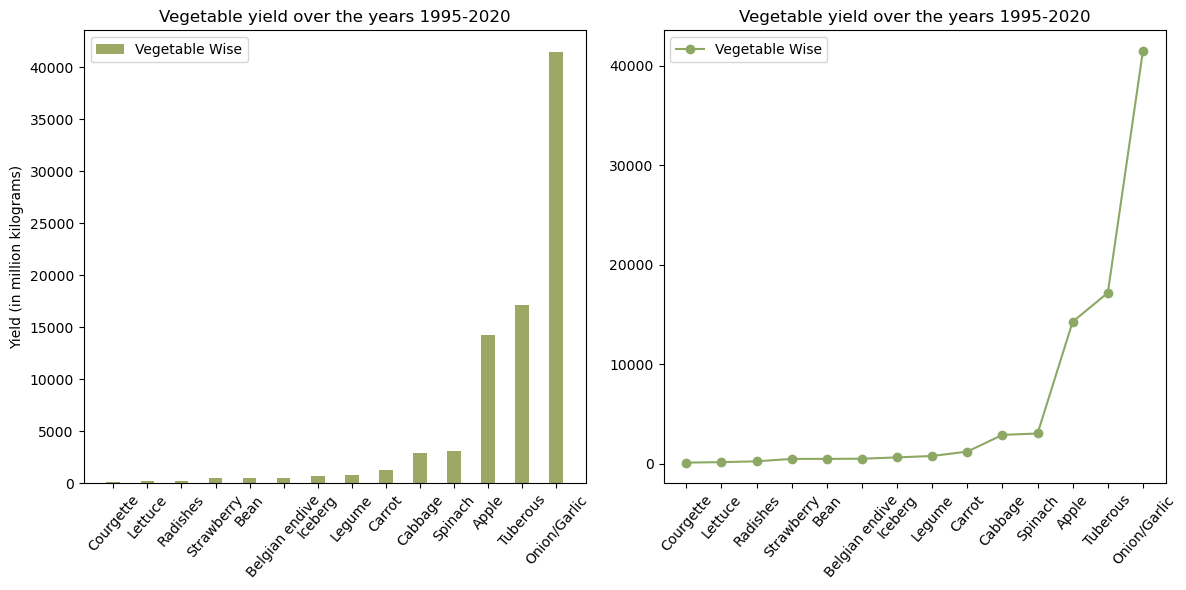

In [39]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 0.4, label='Vegetable Wise', color='#9CA864')

ax1.legend()
ax1.set_title('Vegetable yield over the years 1995-2020')
ax1.set_ylabel('Yield (in million kilograms)')
ax1.tick_params(axis='x', rotation=49)

ax3.plot(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 'o-', label='Vegetable Wise', color='#8CA864')

ax3.legend()
ax3.set_title('Vegetable yield over the years 1995-2020')
ax3.tick_params(axis='x', rotation=49)

plt.tight_layout()
plt.show()

In [41]:
year_wise = df_vegetable.groupby('year').sum()
# Delete last two rows of daraframe
year_wise = year_wise.drop(year_wise.tail(2).index)
year_wise

,gross_yield_million_kilogram
year,
1998,6775.0
2000,7701.6
2005,8619.5
2006,8397.4
2010,9319.4
2015,10226.7
2020,10988.4


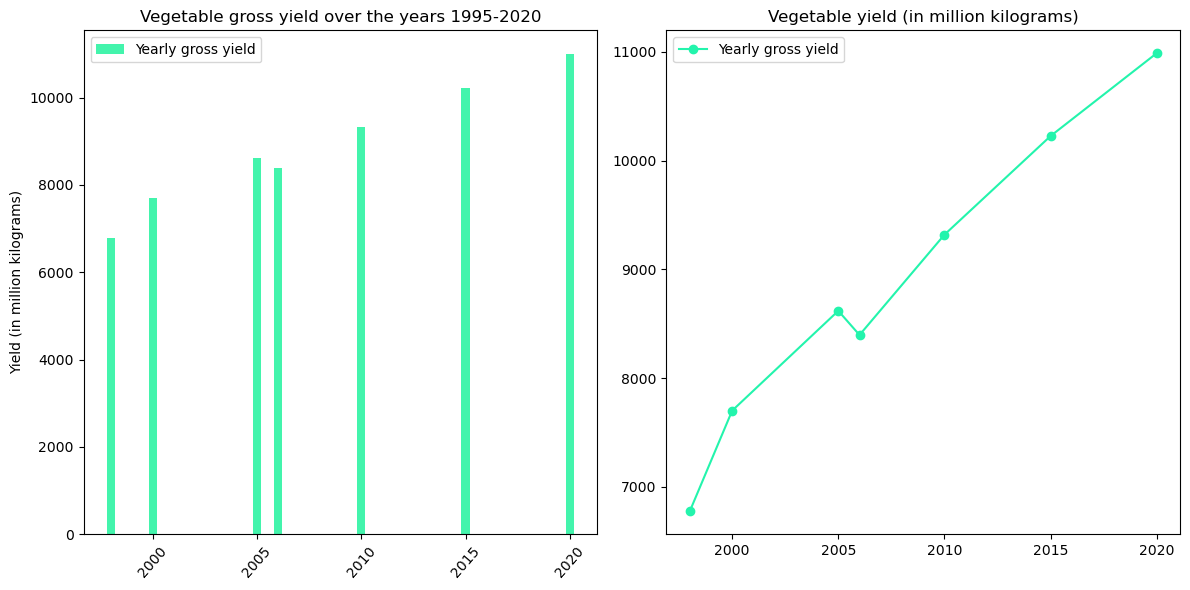

In [69]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(year_wise.index, year_wise.gross_yield_million_kilogram, 0.4, label='Yearly gross yield', color='#43F4AC')

ax1.legend()
ax1.set_title('Vegetable gross yield over the years 1995-2020')
ax1.set_ylabel('Yield (in million kilograms)')
ax1.tick_params(axis='x', rotation=49)

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
ax3.legend()
ax3.set_title('Vegetable yield (in million kilograms)')

plt.tight_layout()
plt.show()

## Water accumulation analysis

In [47]:
# Sum up all factors
factor_wise = df_water.groupby(df_water.index).sum()
# Drop year column
factor_wise = factor_wise.drop(['Year'], axis=1)
# Sort the rows according to the total yield
# factor_wise = factor_wise.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)
factor_wise

,Chromium,Copper,Mercury,Lead,Nickel,Zinc,Nitrogen,Phosphorus
Origin,,,,,,,,
Chemical Manufacturing,14137.0,18967.0,264.0,9051.0,14357.0,100437.0,6730.0,5121749.0
Industrial,53647.0,130876.0,721.0,29517.0,66515.0,277396.0,23261.0,14999096.0
Pharmaceuticals Manufacturing,108.0,741.0,0.0,285.0,529.0,3728.0,480.0,299783.0


In [76]:
yearly_accumulate = df_water.groupby('Year').sum()
# Delete last two rows of daraframe
yearly_accumulate = yearly_accumulate.drop(yearly_accumulate.head(1).index)
yearly_accumulate

,Chromium,Copper,Mercury,Lead,Nickel,Zinc,Nitrogen,Phosphorus
Year,,,,,,,,
2000.0,12933.0,35272.0,190.0,9994.0,16136.0,91725.0,6485.0,4737208.0
2005.0,11651.0,26210.0,101.0,5248.0,12400.0,71744.0,3929.0,2172511.0
2010.0,3361.0,14481.0,26.0,1662.0,6589.0,34745.0,3424.0,1923629.0
2013.0,2755.0,12757.0,29.0,1880.0,5786.0,36190.0,2757.0,1512189.0
2014.0,2776.0,13048.0,15.0,1414.0,5327.0,27289.0,2775.0,1492460.0


In [84]:
heavy_elements_year_wise = yearly_accumulate.Chromium + yearly_accumulate.Copper + yearly_accumulate.Mercury + yearly_accumulate.Mercury + yearly_accumulate.Zinc
nutrients_year_wise = yearly_accumulate.Nitrogen + yearly_accumulate.Phosphorus
heavy_elements_year_wise

Year
2000.0    140310.0
2005.0    109807.0
2010.0     52639.0
2013.0     51760.0
2014.0     43143.0
dtype: float64

In [85]:
heavy_elements_factor_wise = factor_wise.Chromium + factor_wise.Copper + factor_wise.Mercury + factor_wise.Mercury + factor_wise.Zinc
nutrients_factor_wise = factor_wise.Nitrogen + factor_wise.Phosphorus
heavy_elements_factor_wise

Origin
Chemical Manufacturing           134069.0
Industrial                       463361.0
Pharmaceuticals Manufacturing      4577.0
dtype: float64

In [78]:
water_year_2000.index

Index(['Industrial', 'Chemical Manufacturing',
       'Pharmaceuticals Manufacturing'],
      dtype='object', name='Origin')

In [79]:
# factor_wise.Chromium[:]
nutrients_factor_wise

Origin
Chemical Manufacturing            5128479.0
Industrial                       15022357.0
Pharmaceuticals Manufacturing      300263.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

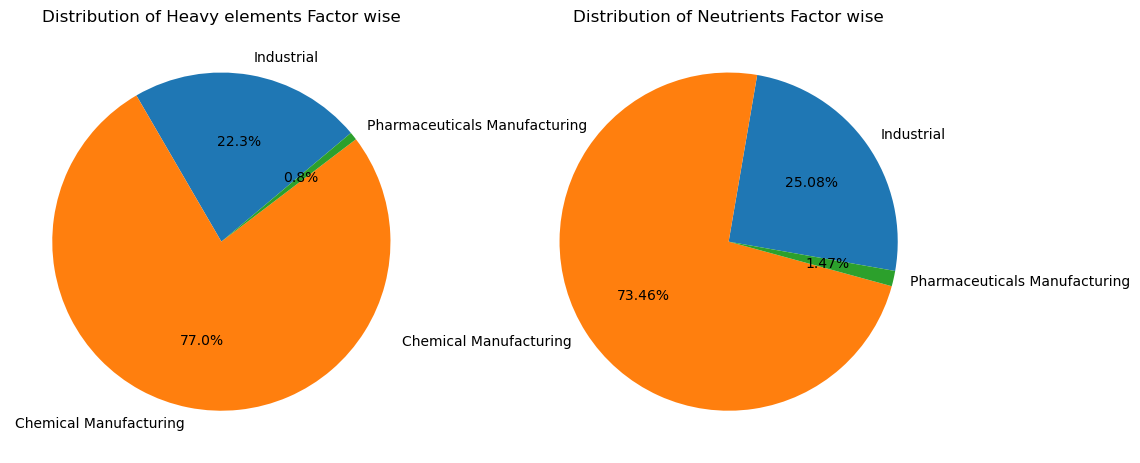

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

axes[0].pie(heavy_elements_factor_wise, labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0].set_title('Distribution of Heavy elements Factor wise')

axes[1].pie(nutrients_factor_wise, labels=water_year_2005.index, autopct='%2.2f%%', startangle=-10)
axes[1].set_title('Distribution of Neutrients Factor wise')

plt.show

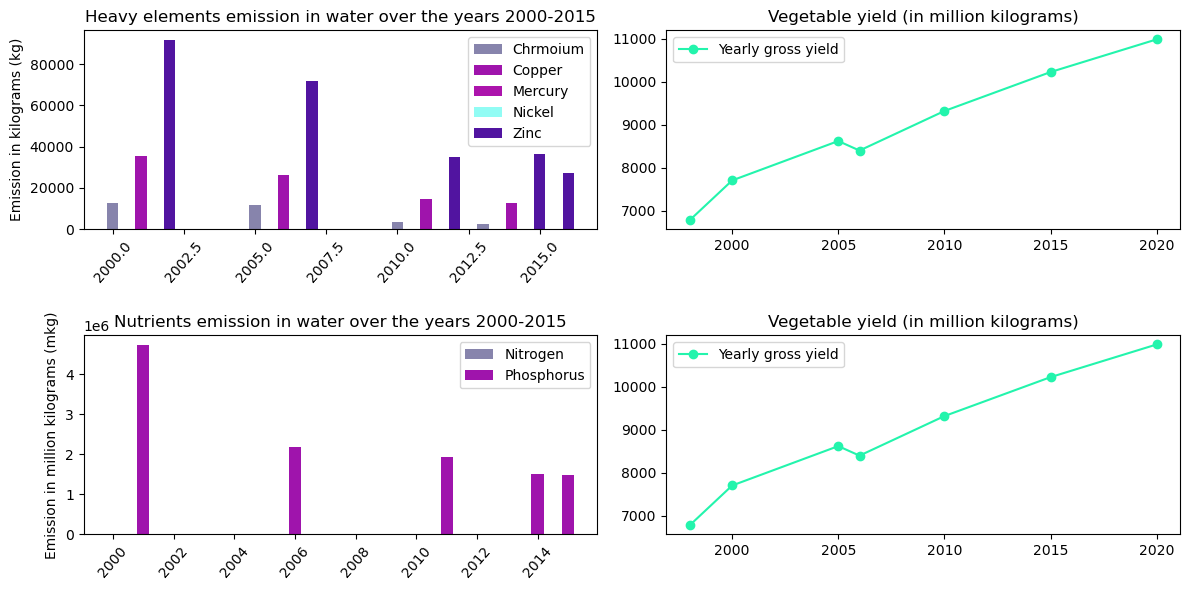

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0,0].bar(yearly_accumulate.index, yearly_accumulate.Chromium, 0.4, label='Chrmoium', color='#8784AC')
axes[0,0].bar(yearly_accumulate.index+1, yearly_accumulate.Copper, 0.4, label='Copper', color='#9F14AC')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Mercury, 0.4, label='Mercury', color='#AC14AC')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Nickel, 0.4, label='Nickel', color='#91FCF4')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Zinc, 0.4, label='Zinc', color='#5114A0')

axes[0,0].legend()
axes[0,0].set_title('Heavy elements emission in water over the years 2000-2015')
axes[0,0].set_ylabel('Emission in kilograms (kg)')
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
axes[0,1].legend()
axes[0,1].set_title('Vegetable yield (in million kilograms)')


axes[1,0].bar(yearly_accumulate.index, yearly_accumulate.Nitrogen, 0.4, label='Nitrogen', color='#8784AC')
axes[1,0].bar(yearly_accumulate.index+1, yearly_accumulate.Phosphorus, 0.4, label='Phosphorus', color='#9F14AC')

axes[1,0].legend()
axes[1,0].set_title('Nutrients emission in water over the years 2000-2015')
axes[1,0].set_ylabel('Emission in million kilograms (mkg)')
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
axes[1,1].legend()
axes[1,1].set_title('Vegetable yield (in million kilograms)')


plt.tight_layout()
plt.show()

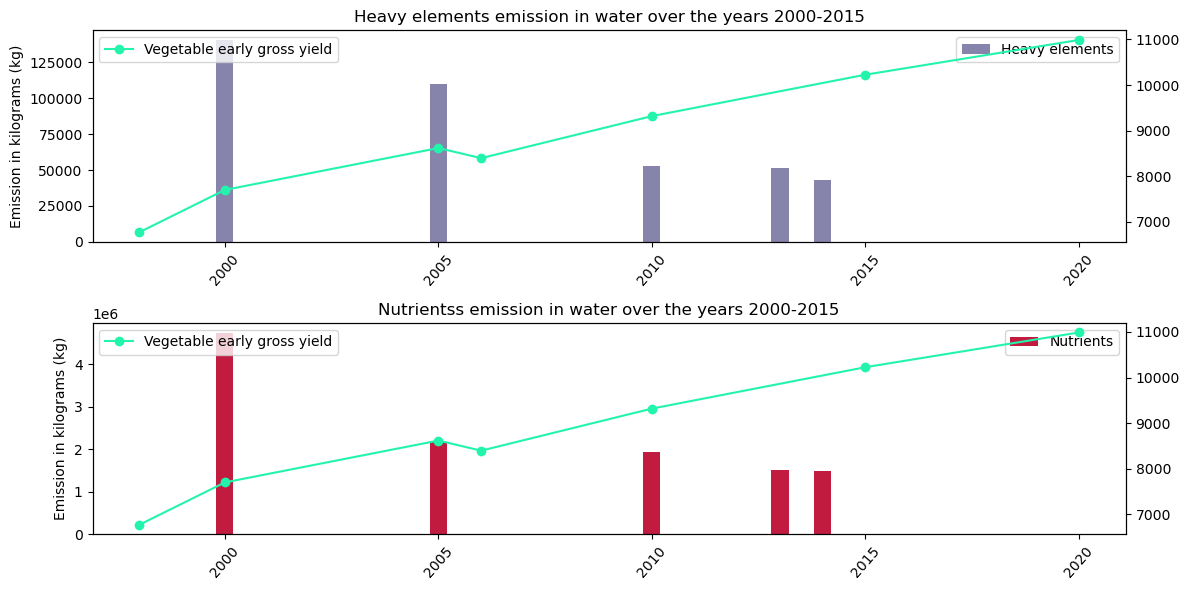

In [114]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].bar(yearly_accumulate.index, heavy_elements_year_wise, 0.4, label='Heavy elements', color='#8784AC')
axes[0].legend()
axes[0].set_title('Heavy elements emission in water over the years 2000-2015')
axes[0].set_ylabel('Emission in kilograms (kg)')
axes[0].tick_params(axis='x', rotation=49)

ax2 = axes[0].twinx()

ax2.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax2.legend()


axes[1].bar(yearly_accumulate.index, nutrients_year_wise, 0.4, label='Nutrients', color='#C11C40')
axes[1].legend()
axes[1].set_title('Nutrientss emission in water over the years 2000-2015')
axes[1].set_ylabel('Emission in kilograms (kg)')
axes[1].tick_params(axis='x', rotation=49)

ax3 = axes[1].twinx()

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax3.legend()


plt.tight_layout()
plt.show()

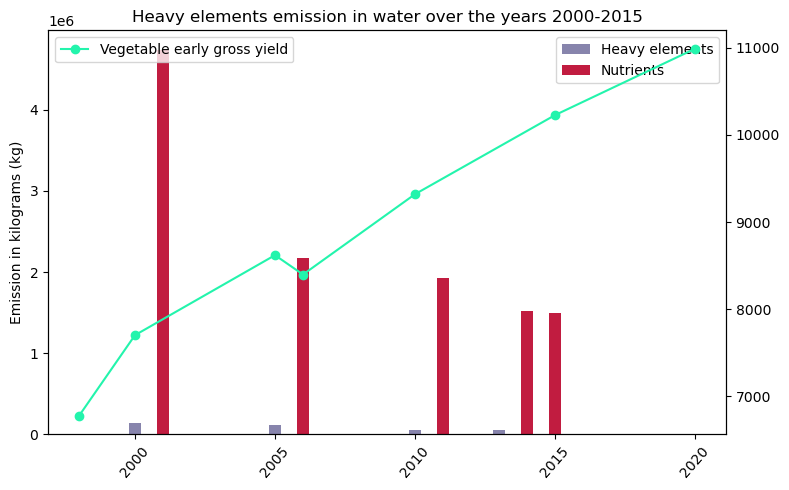

In [118]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.bar(yearly_accumulate.index, heavy_elements_year_wise, 0.4, label='Heavy elements', color='#8784AC')
axes.bar(yearly_accumulate.index+1, nutrients_year_wise, 0.4, label='Nutrients', color='#C11C40')
axes.legend()
axes.set_title('Heavy elements emission in water over the years 2000-2015')
axes.set_ylabel('Emission in kilograms (kg)')
axes.tick_params(axis='x', rotation=49)

ax3 = axes.twinx()

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax3.legend()


plt.tight_layout()
plt.show()

#  <span style="color:purple"> Discussion/Conclusions:  </span>